# Python imports

In [1]:
# Show plots as part of the notebook (this is a Jupyter-specific operation)
%matplotlib inline
import time
import matplotlib.pyplot as plt
import requests
import xmltodict
# Standard library packages
import os

# Import Pandas and Seaborn
import pandas as pd
import seaborn as sns

# Import Biopython tools for running local BLASTX
from Bio.Blast.Applications import NcbiblastxCommandline
from Bio.Blast.Applications import NcbiblastnCommandline

#For execution time tracking
from datetime import datetime
from pytz import timezone

In [2]:
now_time = datetime.now(timezone('America/Chicago'))
print(now_time.strftime('%I:%M:%S %p'))

09:56:49 PM


# Running and analyzing a local BLASTN search for July142020-ALL-R1.fasta

In [3]:
cmd_blastn = NcbiblastnCommandline(query='July142020-ALL-R1.fasta',
                      out='July142020-ALL-R1_blastn.tab',
                      outfmt=6,
                      db='db_ref_ALL_16S/db_ref_ALL_16S',
                      num_threads = 64)

In [4]:
# Get a working command-line
print(cmd_blastn)

blastn -out July142020-ALL-R1_blastn.tab -outfmt 6 -query July142020-ALL-R1.fasta -db db_ref_ALL_16S/db_ref_ALL_16S -num_threads 64


In [5]:
%%time
cmd_blastn()

CPU times: user 756 ms, sys: 567 ms, total: 1.32 s
Wall time: 4h 24min 12s


('', '')

In [ ]:
#https://widdowquinn.github.io/2018-03-06-ibioic/02-sequence_databases/03-programming_for_blast.html#runblastx
# Run BLASTX, and catch STDOUT/STDERR
# !! Do not execute cell if skipping computation !!
#stdout, stderr = cmd_blastn()

# Check STDOUT, STDERR
#print("STDOUT: %s" % stdout)
#print("STDERR: %s" % stderr)

# EDA for BLAST Results: "July142020-ALL-R1_blastn.tab" 

In [61]:
# !! If you are skipping computational steps, uncomment the line below !!
#blastout = os.path.join('prepped', 'kitasatospora', 'AMK19_00175_blastx_kitasatospora.tab')  # BLAST output

# Read BLASTX output
results = pd.read_csv("July142020-ALL-R1_blastn.tab", sep="\t", header=None)

In [62]:
results.shape

(17592254, 12)

In [63]:
# Inspect results table
results.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.780000e-44,180.0
1,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,87.368,95,11,1,8,102,4262,4169,8.500000e-23,108.0
2,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0
3,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.721,129,16,4,16,142,110876,110751,1.410000e-25,117.0
4,A00842:193:HMWFWDRXY:1:2101:18322:1094,KX284709.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0


In [64]:
# Define column headers
headers = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore']

# Assign headers
results.columns = headers

# Inspect modified table
results.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.780000e-44,180.0
1,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,87.368,95,11,1,8,102,4262,4169,8.500000e-23,108.0
2,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0
3,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.721,129,16,4,16,142,110876,110751,1.410000e-25,117.0
4,A00842:193:HMWFWDRXY:1:2101:18322:1094,KX284709.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0


In [65]:
# Show a summary of the results table data
results.describe()

,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
count,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07,1.759225e+07
mean,9.075628e+01,1.063887e+02,9.841828e+00,9.337685e-01,1.467575e+01,1.195183e+02,7.924650e+04,7.924554e+04,6.606183e-08,1.355527e+02
std,5.302975e+00,3.873977e+01,7.041221e+00,1.630147e+00,2.426050e+01,3.546436e+01,3.583510e+05,3.583511e+05,3.721963e-05,4.917367e+01
min,7.284800e+01,2.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.500000e+01,1.000000e+00,1.000000e+00,1.700000e-74,3.810000e+01
25%,8.698600e+01,7.300000e+01,4.000000e+00,0.000000e+00,1.000000e+00,9.400000e+01,7.190000e+02,7.170000e+02,3.840000e-41,9.710000e+01
50%,9.090900e+01,1.120000e+02,9.000000e+00,0.000000e+00,2.000000e+00,1.350000e+02,6.070000e+03,6.067000e+03,1.810000e-29,1.300000e+02
75%,9.473700e+01,1.450000e+02,1.500000e+01,1.000000e+00,1.700000e+01,1.510000e+02,8.340900e+04,8.340300e+04,1.840000e-19,1.690000e+02
max,1.000000e+02,1.790000e+02,4.100000e+01,2.000000e+01,1.250000e+02,1.510000e+02,6.574866e+06,6.574884e+06,1.100000e-01,2.790000e+02


In [66]:
# Show all subject matches
print(results['subject'])

0            KJ410683.1
1            KJ410683.1
2           NC_031144.1
3           NC_031144.1
4            KX284709.1
               ...     
17592249       M26358.1
17592250     AY102613.1
17592251     AY690210.1
17592252     AF149916.1
17592253     HM973758.1
Name: subject, Length: 17592254, dtype: object


In [67]:
results.shape

(17592254, 12)

# Filter BLASTn Results (E-Value < 1e-20 & pc_identity >= 90.00)

In [68]:
results_target_ev = results.loc[results['e_value'] < 1e-20]

In [69]:
results_target_ev.shape

(12603414, 12)

In [72]:
results_target_pci = results_target_ev.loc[results_target_ev['pc_identity'] >= 90.00]

In [73]:
results_target_pci.shape

(6807930, 12)

In [74]:
results_target_pci.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.780000e-44,180.0
820,A00842:193:HMWFWDRXY:1:2101:19316:1501,NC_008588.1,96.104,77,3,0,3,79,33660,33736,2.350000e-28,126.0
821,A00842:193:HMWFWDRXY:1:2101:19316:1501,MN937452.1,96.104,77,3,0,3,79,33653,33729,2.350000e-28,126.0
822,A00842:193:HMWFWDRXY:1:2101:19316:1501,EF067920.1,96.104,77,3,0,3,79,33660,33736,2.350000e-28,126.0
823,A00842:193:HMWFWDRXY:1:2101:19316:1501,MW645084.1,96.053,76,3,0,3,78,43340,43415,8.440000e-28,124.0


In [75]:
results_target_pci.to_csv('01_db_blastn_July142020_filtered_1e-20_90perc-id_subj.csv', index=False)

In [76]:
%%time
df = pd.read_csv('01_db_blastn_July142020_filtered_1e-20_90perc-id_subj.csv')

CPU times: user 3.12 s, sys: 459 ms, total: 3.57 s
Wall time: 3.58 s


In [77]:
df.shape

(6807930, 12)

In [78]:
df.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.780000e-44,180.0
1,A00842:193:HMWFWDRXY:1:2101:19316:1501,NC_008588.1,96.104,77,3,0,3,79,33660,33736,2.350000e-28,126.0
2,A00842:193:HMWFWDRXY:1:2101:19316:1501,MN937452.1,96.104,77,3,0,3,79,33653,33729,2.350000e-28,126.0
3,A00842:193:HMWFWDRXY:1:2101:19316:1501,EF067920.1,96.104,77,3,0,3,79,33660,33736,2.350000e-28,126.0
4,A00842:193:HMWFWDRXY:1:2101:19316:1501,MW645084.1,96.053,76,3,0,3,78,43340,43415,8.440000e-28,124.0


In [79]:
df['subject'].nunique()

9583

### Retrieving (efetch) scientific name (GBSeq_definition) from NCBI nucleotide database (nuccore)
#### seq id header in each 16S fasta sequences of built database which were succsessfully blasted (subject column) will be translated into the corresponding "Genus species" name

In [93]:
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/{}"
db = "nuccore"

In [94]:
def get_taxon_name(tax_id):
    try:
        efetch = "efetch.fcgi?db={}&id={}&rettype=json".format(db, tax_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_dict = xmltodict.parse(efetch_response.content)
        Definition = efetch_dict['GBSet']['GBSeq']['GBSeq_definition']
        Definition = Definition.split(',')
        Definition = Definition[0]
        time.sleep(0.5)
    except:
        Definition = tax_id
        pass
 
    return Definition

In [95]:
def get_7level_taxonomy(tax_id):
    try:   
        efetch = "efetch.fcgi?db={}&id={}&rettype=json".format(db, tax_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_dict = xmltodict.parse(efetch_response.content)
        GBSeq_taxonomy = efetch_dict['GBSet']['GBSeq']['GBSeq_taxonomy']
#        GBSeq_taxonomy_class = GBSeq_taxonomy.split("; ")
#        GBSeq_taxonomy_class = GBSeq_taxonomy_class[2]
        time.sleep(0.5)
    except:
        GBSeq_taxonomy = tax_id
        pass
    
    return GBSeq_taxonomy

In [96]:
get_7level_taxonomy('KX284709.1')

'Eukaryota; Rhodophyta; Florideophyceae; Rhodymeniophycidae; Rhodymeniales; Rhodymeniaceae; Rhodymenia'

### Proof of Concept (PoC)

In [97]:
efetch = "efetch.fcgi?db={}&id={}&rettype=json".format("nuccore", "NC_031144.1")
efetch_response = requests.get(base_url.format(efetch))

In [98]:
type(efetch_response.content)

bytes

In [99]:
efetch_response_to_dict = xmltodict.parse(efetch_response.content)

In [100]:
type(efetch_response_to_dict)

collections.OrderedDict

In [101]:
efetch_response_to_dict.keys()

odict_keys(['GBSet'])

In [107]:
def get_gbqualifier (nuc_id):
    try:
        efetch = "efetch.fcgi?db={}&id={}&rettype=json".format(db, nuc_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_response_to_dict = xmltodict.parse(efetch_response.content)
        GBQualifier_value = efetch_response_to_dict['GBSet']['GBSeq']['GBSeq_feature-table']['GBFeature'][0]\
                                                   ['GBFeature_quals']['GBQualifier'][3]['GBQualifier_value']
        GBQualifier_taxon_id = GBQualifier_value.split(':')
        GBQualifier_taxon_id = GBQualifier_taxon_id[1]
        time.sleep(0.5)
    except:
        GBQualifier_taxon_id = nuc_id
        pass
 
    return GBQualifier_taxon_id

In [108]:
get_gbqualifier ("NC_031144.1")

'31502'

In [ ]:
def enrich_dataset(df):
    taxon_value = df['subject']
    ScientificName = get_taxon_name(taxon_value)
    df['taxon_name'] = ScientificName
    return df

In [97]:
%%time
def enrich_dataset(df):
    taxon_value = df['subject']
    ClassName = get_7level_taxonomy(taxon_value)
#    ScientificName = get_taxon_name(taxon_value)
#    df['taxon_name'] = ScientificName
    df['class_name'] = ClassName
    return df

CPU times: user 34 µs, sys: 0 ns, total: 34 µs
Wall time: 62 µs


In [98]:
%%time
enrich_dataset(df)

CPU times: user 153 ms, sys: 72.3 ms, total: 225 ms
Wall time: 695 ms


,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore,class_name
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.780000e-44,180.0,KJ410683.1
1,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,87.368,95,11,1,8,102,4262,4169,8.500000e-23,108.0,KJ410683.1
2,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0,NC_031144.1
3,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.721,129,16,4,16,142,110876,110751,1.410000e-25,117.0,NC_031144.1
4,A00842:193:HMWFWDRXY:1:2101:18322:1094,KX284709.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0,KX284709.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17261953,A00842:193:HMWFWDRXY:2:2278:11496:36933,M26358.1,83.333,150,23,2,3,151,1062,1210,1.080000e-31,137.0,M26358.1
17261954,A00842:193:HMWFWDRXY:2:2278:11496:36933,AY102613.1,87.603,121,12,2,3,123,1029,1146,1.080000e-31,137.0,AY102613.1
17261955,A00842:193:HMWFWDRXY:2:2278:11496:36933,AY690210.1,92.391,92,7,0,60,151,1,92,5.040000e-30,132.0,AY690210.1
17261956,A00842:193:HMWFWDRXY:2:2278:11496:36933,AF149916.1,83.221,149,20,3,5,151,1766,1911,5.040000e-30,132.0,AF149916.1


In [99]:
#df = df['subject'].value_counts()
#df = pd.Series(df)
#df.to_csv('02_July142020-ALL-R1_blastn_1e-20.csv')
df.to_csv('02_July142020-ALL-R1_blastn_1e-20_Class.csv')

In [100]:
#df = pd.read_csv('02_July142020-ALL-R1_blastn_1e-20.csv')
df = pd.read_csv('02_July142020-ALL-R1_blastn_1e-20_Class.csv')
#df.columns.values[0] = "subject"
#df.columns.values[1] = "count"

In [101]:
df.head()

,Unnamed: 0,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore,class_name
0,0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.780000e-44,180.0,KJ410683.1
1,1,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,87.368,95,11,1,8,102,4262,4169,8.500000e-23,108.0,KJ410683.1
2,2,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0,NC_031144.1
3,3,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.721,129,16,4,16,142,110876,110751,1.410000e-25,117.0,NC_031144.1
4,4,A00842:193:HMWFWDRXY:1:2101:18322:1094,KX284709.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0,KX284709.1


In [25]:
df.shape

(9888, 2)

In [26]:
%%time
df = df.apply(enrich_dataset, axis=1)

CPU times: user 6min 55s, sys: 26.5 s, total: 7min 21s
Wall time: 4h 5min 8s


In [27]:
df.to_csv('03_July142020-ALL-R1_blastn_1e-20-TaxaName.csv', index=False)

In [28]:
df = pd.read_csv('03_July142020-ALL-R1_blastn_1e-20-TaxaName.csv')

In [29]:
df.shape

(9888, 3)

In [30]:
df.describe()

,count
count,9888.000000
mean,1274.617112
std,3164.204126
min,1.000000
25%,130.000000
50%,369.000000
75%,759.000000
max,56779.000000


In [31]:
df.head(50)

,subject,count,taxon_name
0,JAGRRH010000013.1,56779,Nitzschia inconspicua strain hildebrandi tig00...
1,KM198929.1,24761,Cyanophora paradoxa strain NIES-763 cyanelle
2,MF167427.1,24303,Cyanoptyche gloeocystis strain SAG 4.97 plastid
3,NC_038215.1,23986,Cyanophora sudae strain NIES-764 plastid
4,U30821.1,23825,Cyanophora paradoxa cyanelle
5,NC_001675.1,23633,Cyanophora paradoxa cyanelle
6,MG601102.1,23543,Cyanophora sudae strain NIES-764 plastid
7,NC_038216.1,23454,Cyanophora biloba strain UTEX LB 2766 plastid
8,NC_011087.1,23096,Paulinella chromatophora chromatophore
9,MG601103.1,23048,Cyanophora biloba strain UTEX LB 2766 plastid


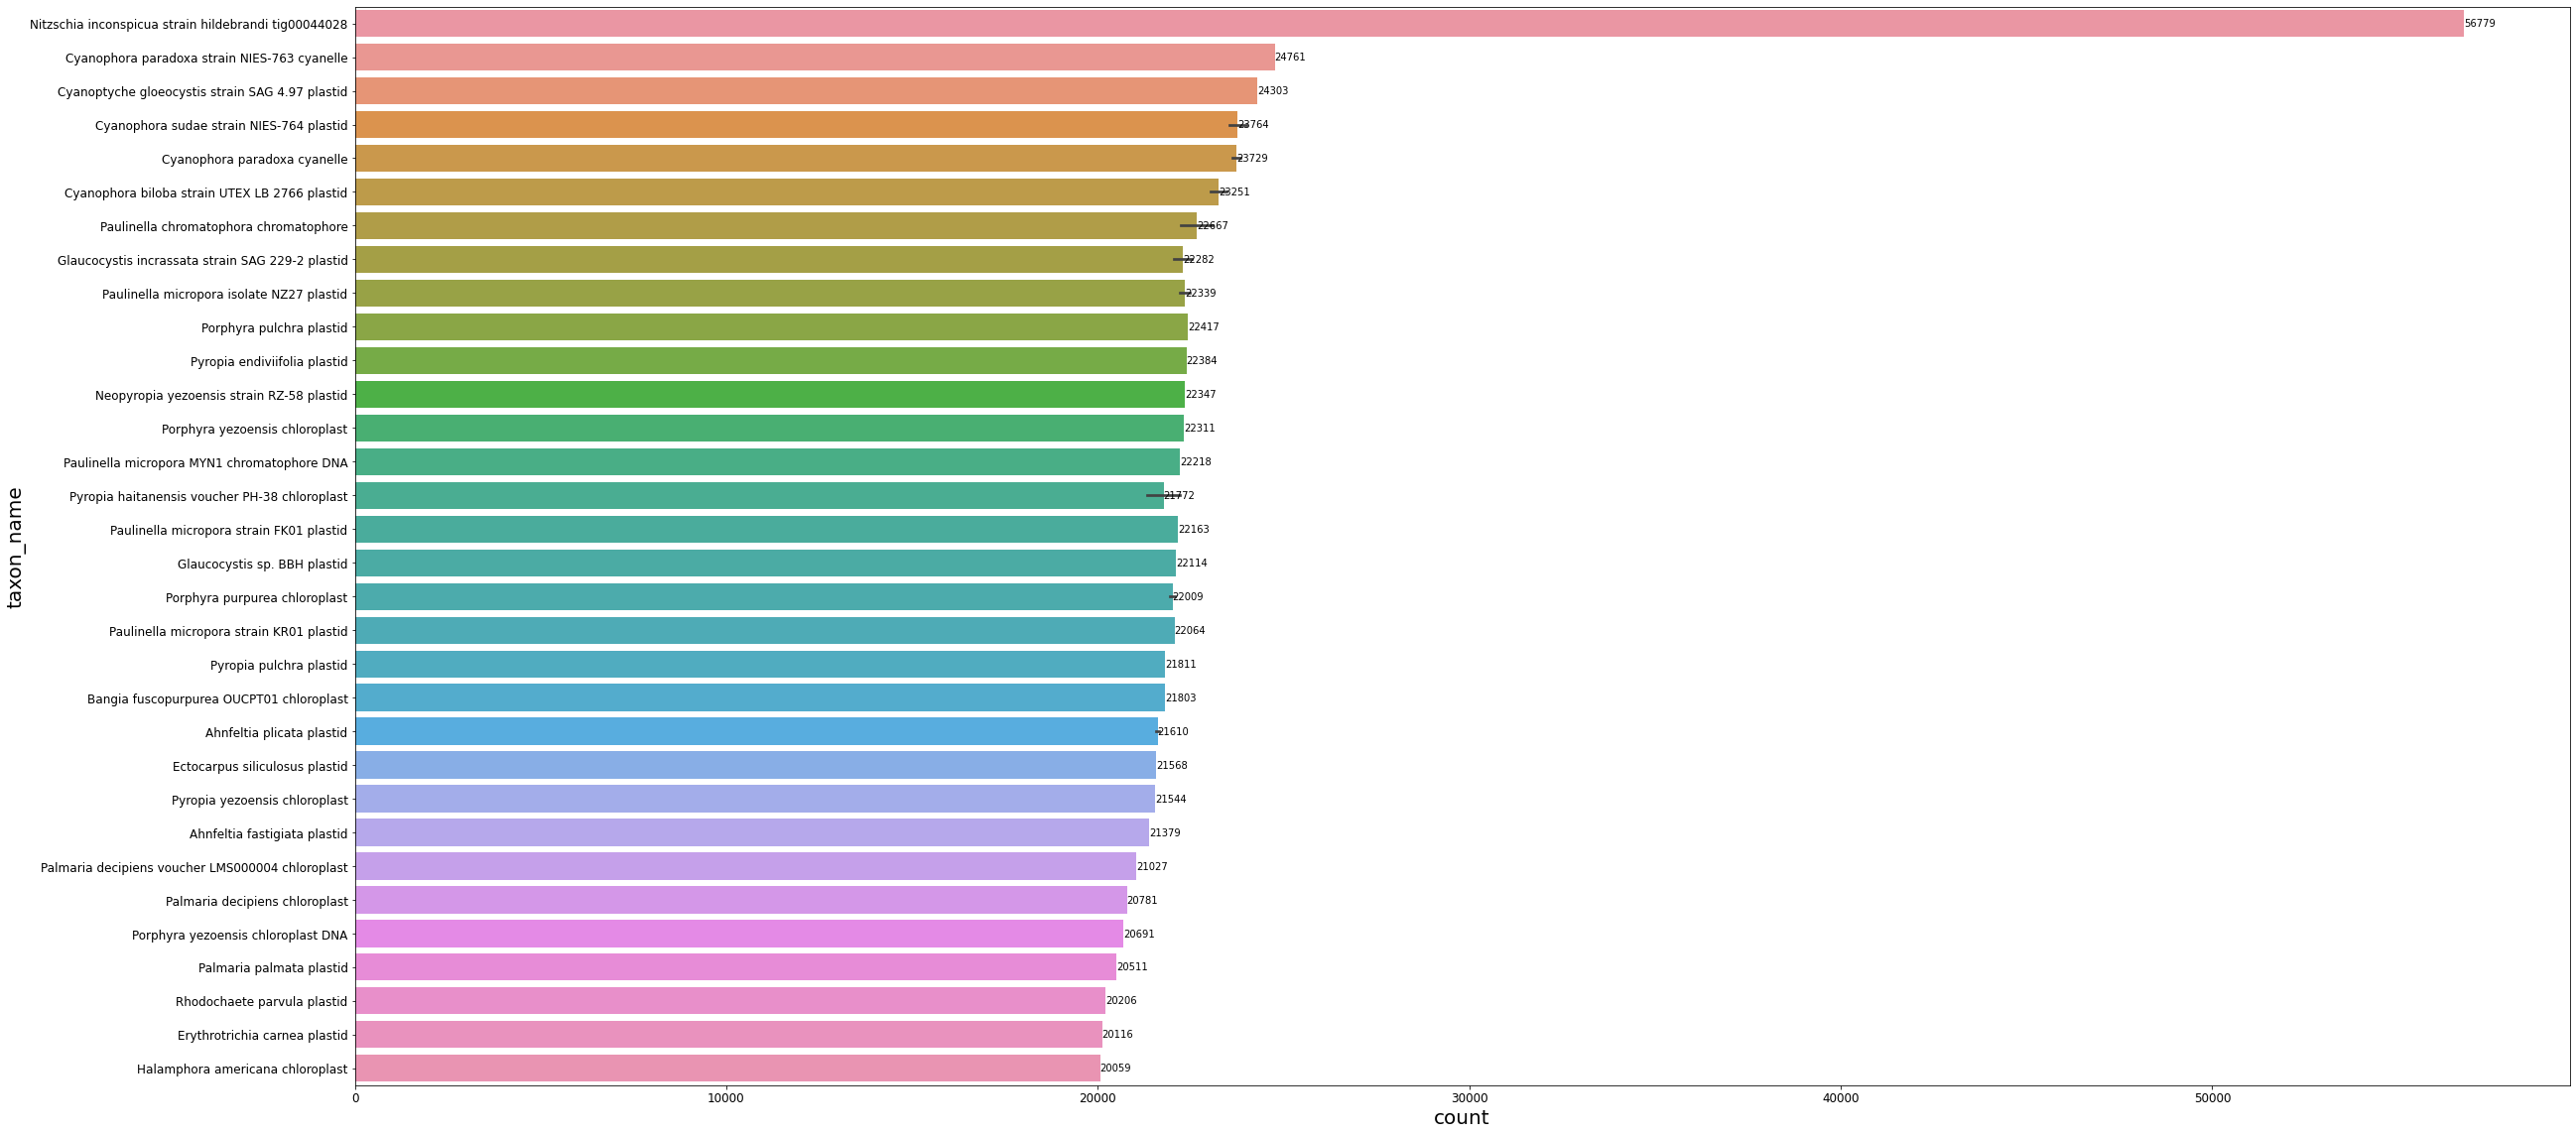

In [32]:
plt.figure(figsize = (40,20))
ax = sns.barplot(y='taxon_name', x='count', data=df[df['count'] >= 20000])
ax.set_xlabel("count",fontsize=20)
ax.set_ylabel("taxon_name",fontsize=20)
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')
    
plt.savefig('03_July142020_1e-20.jpeg', dpi=700)

# Filter BLASTn Results (E-Value < 10 ^ -6 or 1e-6)

In [24]:
results_target = results.loc[results['e_value'] < 0.000001]

In [25]:
results_target

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.780000e-44,180.0
1,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,87.368,95,11,1,8,102,4262,4169,8.500000e-23,108.0
2,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0
3,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.721,129,16,4,16,142,110876,110751,1.410000e-25,117.0
4,A00842:193:HMWFWDRXY:1:2101:18322:1094,KX284709.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17592249,A00842:193:HMWFWDRXY:2:2278:11496:36933,M26358.1,83.333,150,23,2,3,151,1062,1210,1.080000e-31,137.0
17592250,A00842:193:HMWFWDRXY:2:2278:11496:36933,AY102613.1,87.603,121,12,2,3,123,1029,1146,1.080000e-31,137.0
17592251,A00842:193:HMWFWDRXY:2:2278:11496:36933,AY690210.1,92.391,92,7,0,60,151,1,92,5.040000e-30,132.0
17592252,A00842:193:HMWFWDRXY:2:2278:11496:36933,AF149916.1,83.221,149,20,3,5,151,1766,1911,5.040000e-30,132.0


In [26]:
results_target.shape

(17261958, 12)

In [27]:
results_target.to_csv('01_db_blastn_July142020_filtered_1e-20_subj.csv', index=False)

In [28]:
df = pd.read_csv('01_db_blastn_July142020_filtered_1e-20_subj.csv')

In [29]:
df.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.780000e-44,180.0
1,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,87.368,95,11,1,8,102,4262,4169,8.500000e-23,108.0
2,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0
3,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.721,129,16,4,16,142,110876,110751,1.410000e-25,117.0
4,A00842:193:HMWFWDRXY:1:2101:18322:1094,KX284709.1,83.916,143,18,4,2,142,138599,138738,5.040000e-30,132.0


In [30]:
df['subject'].nunique()

10033

### Retrieving (efetch) scientific name (GBSeq_definition) from NCBI nucleotide database (nuccore)
#### seq id header in each 16S fasta sequences of built database which were succsessfully blasted (subject column) will be translated into the corresponding "Genus species" name

In [119]:
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/{}"
db = "nuccore"

In [120]:
def get_taxon_name(tax_id):
    try:
        efetch = "efetch.fcgi?db={}&id={}&rettype=json".format(db, tax_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_dict = xmltodict.parse(efetch_response.content)
        Definition = efetch_dict['GBSet']['GBSeq']['GBSeq_definition']
        Definition = Definition.split(',')
        Definition = Definition[0]
        time.sleep(0.5)
    except:
        Definition = tax_id
        pass
 
    return Definition

In [121]:
get_taxon_name("NC_031144.1")

'Rhodymenia pseudopalmata plastid'

In [34]:
def enrich_dataset(df):
    taxon_value = df['subject']
    ScientificName = get_taxon_name(taxon_value)
    df['taxon_name'] = ScientificName
    return df

In [35]:
df = df['subject'].value_counts()
df = pd.Series(df)
df.to_csv('02_July142020-ALL-R1_blastn_1e-6.csv')

In [36]:
df = pd.read_csv('02_July142020-ALL-R1_blastn_1e-6.csv')
df.columns.values[0] = "subject"
df.columns.values[1] = "count"

In [37]:
df.head()

,subject,count
0,JAGRRH010000013.1,74211
1,LR877147.1,44319
2,LR877155.1,36624
3,KM198929.1,32369
4,NC_038215.1,32052


In [38]:
df.shape

(10033, 2)

In [39]:
%%time
df = df.apply(enrich_dataset, axis=1)

CPU times: user 7min 23s, sys: 31.9 s, total: 7min 55s
Wall time: 4h 7min 1s


In [40]:
df.to_csv('03_July142020-ALL-R1_blastn_1e-6-TaxaName.csv', index=False)

In [41]:
df = pd.read_csv('03_July142020-ALL-R1_blastn_1e-6-TaxaName.csv')

In [42]:
df.shape

(10033, 3)

In [43]:
df.describe()

,count
count,10033.000000
mean,1720.518090
std,4220.878948
min,1.000000
25%,208.000000
50%,501.000000
75%,983.000000
max,74211.000000


In [44]:
df.head(50)

,subject,count,taxon_name
0,JAGRRH010000013.1,74211,Nitzschia inconspicua strain hildebrandi tig00...
1,LR877147.1,44319,Angomonas deanei strain Crithidia deanei Carva...
2,LR877155.1,36624,Angomonas deanei strain Crithidia deanei Carva...
3,KM198929.1,32369,Cyanophora paradoxa strain NIES-763 cyanelle
4,NC_038215.1,32052,Cyanophora sudae strain NIES-764 plastid
5,MG601102.1,31309,Cyanophora sudae strain NIES-764 plastid
6,MF167427.1,31165,Cyanoptyche gloeocystis strain SAG 4.97 plastid
7,U30821.1,31144,Cyanophora paradoxa cyanelle
8,LR877169.1,31048,Angomonas deanei strain Crithidia deanei Carva...
9,NC_038216.1,30908,Cyanophora biloba strain UTEX LB 2766 plastid


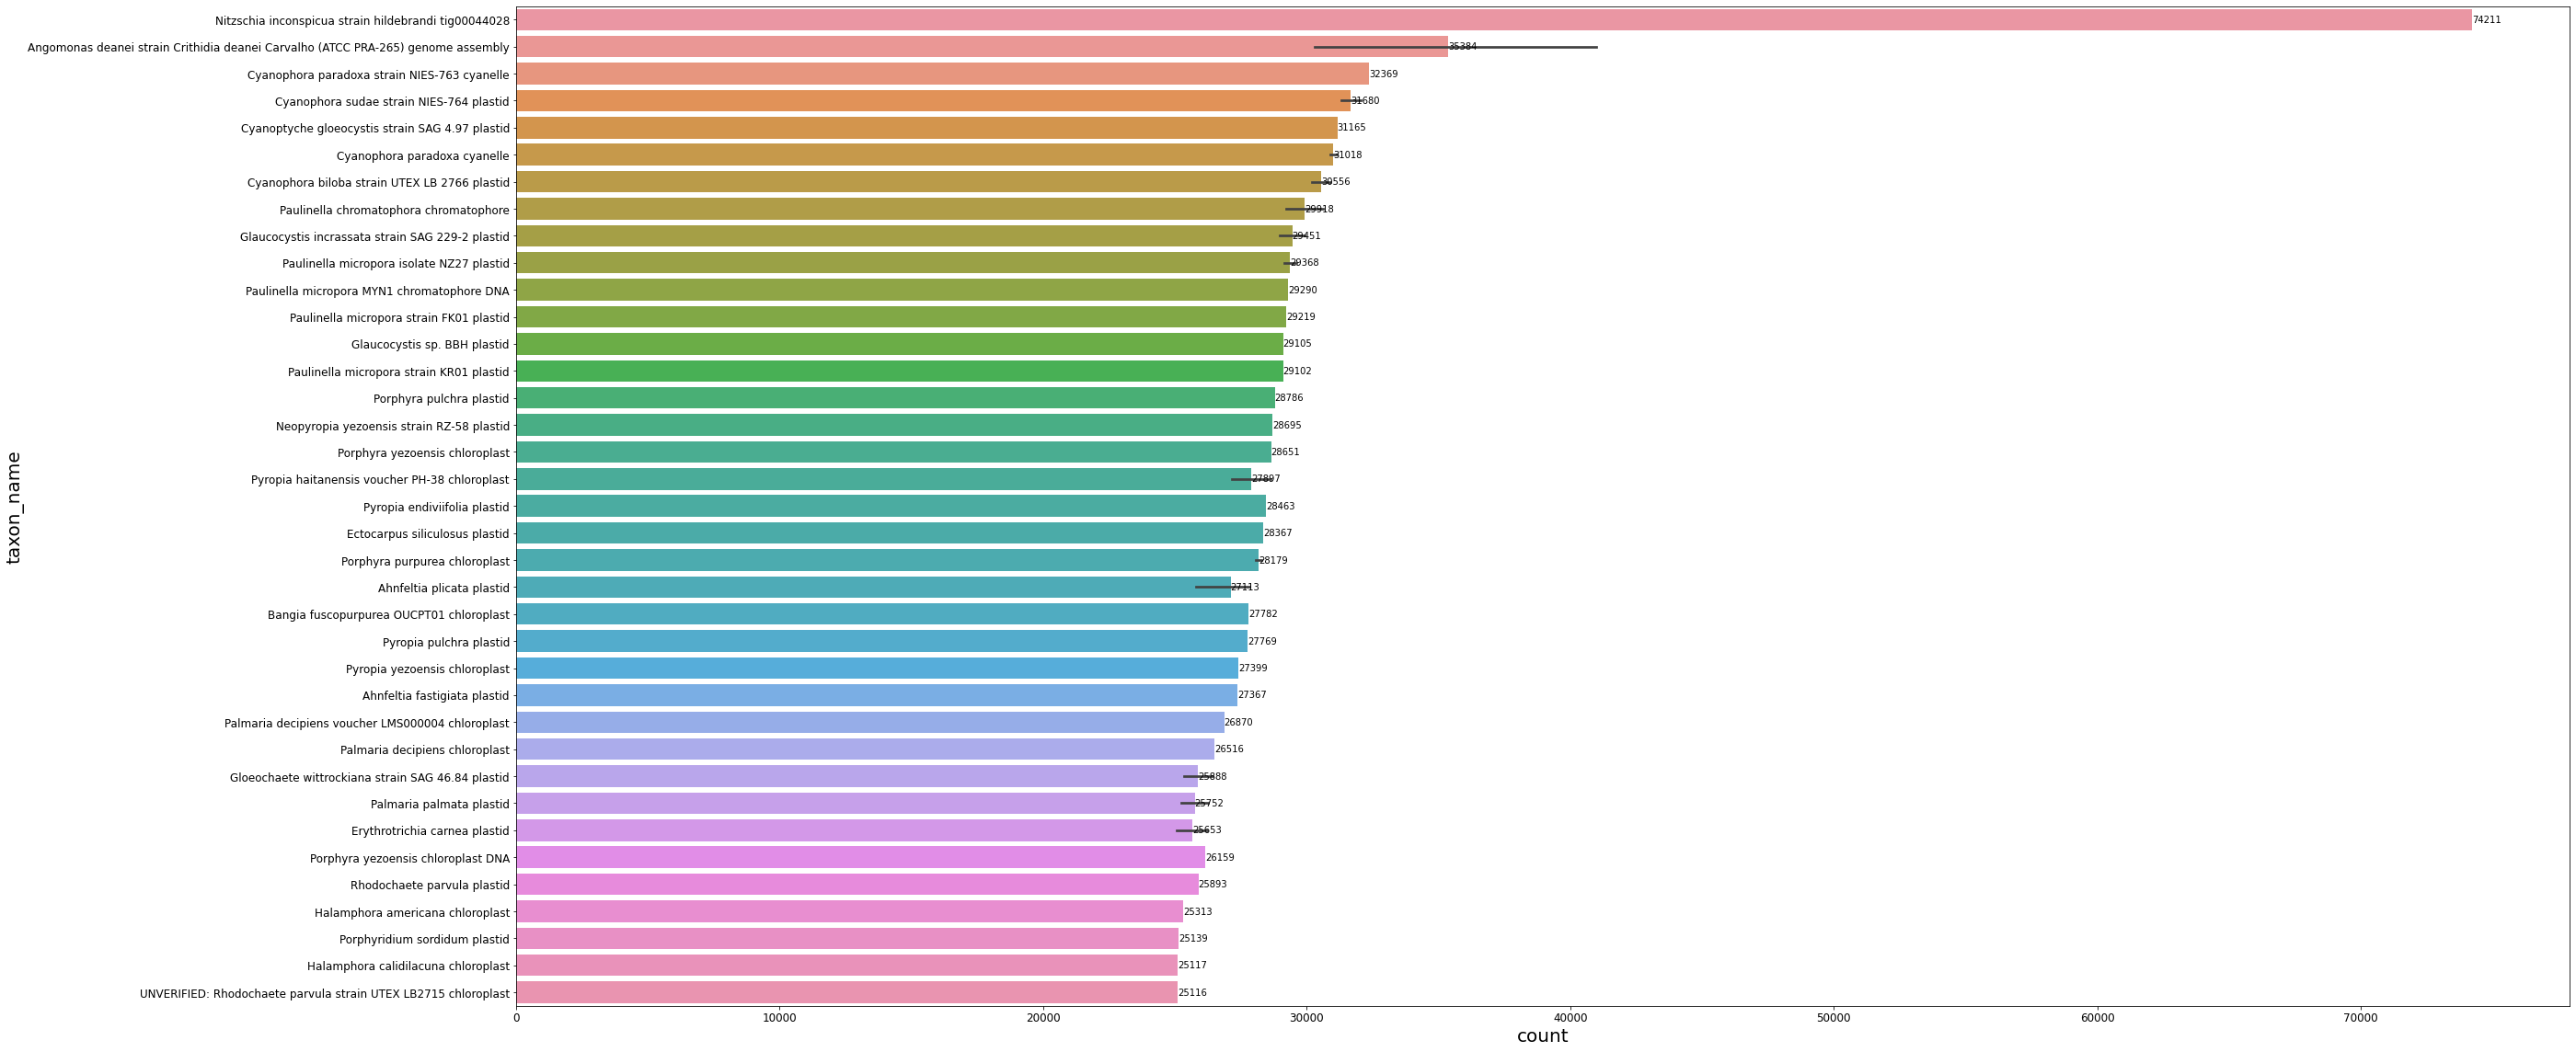

In [45]:
plt.figure(figsize = (40,20))
ax = sns.barplot(y='taxon_name', x='count', data=df[df['count'] >= 25000])
ax.set_xlabel("count",fontsize=20)
ax.set_ylabel("taxon_name",fontsize=20)
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')
    
plt.savefig('03_July142020_1e-6.jpeg', dpi=700)

In [ ]:
# Create a new column describing how long the alignment is on the query sequence
qaln_length = abs(results['query_end'] - results['query_start']) + 1
print(qaln_length)

In [ ]:
# Add qaln_length to the results table as a new column
results['qaln_length'] = qaln_length
results.head()

In [ ]:
# Create a scatterplot
results.plot.scatter('pc_identity', 'e_value')
plt.title("E value vs %identity");              # add a title to the plot

In [ ]:
# SOLUTION - EXERCISE 01
# !! Do not execute this cell if skipping computational step !!

# We can reuse the directories and db, but need to define new input/output filenames
query = os.path.join(datadir, 'lantibiotic.fasta')                                   # query sequence(s)
blastout = os.path.join(outdir, 'lantibiotic_blastx_kitasatospora.tab')              # BLAST output

# Create command-line for BLASTX
cmd_blastx = NcbiblastxCommandline(query=query, out=blastout, outfmt=6, db=db)

# Run BLASTX, and catch STDOUT/STDERR
stdout, stderr = cmd_blastx()

# Check STDOUT, STDERR
print("STDOUT: %s" % stdout)
print("STDERR: %s" % stderr)

In [ ]:
# !! Uncomment the line below, if skipping computational step !!
# blastout = os.path.join('prepped', 'kitasatospora', 'lantibiotic_blastx_kitasatospora.tab')

# Read BLASTX output, and reuse the column headers defined earlier
results = pd.read_csv(blastout, sep="\t", header=None)
results.columns = headers

# Create a scatterplot
results.plot.scatter('bitscore', 'pc_identity')
plt.title("%identity vs bitscore");  